# Figure S17. Robustness of the findings when fitting the models using an alternative Gaussian noise seed

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
    "micamics": os.path.join(os.environ["PROJECT_DIR"], "output", "micamics")
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = '#44546A'
add_text = True # add statistics as text to some figures

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load data:

In [5]:
all_stats = {}
all_ICCs_by_age = {}
all_data = {}
all_I_E = {}
for alt in ['main', 'altseed', 'main_altseed']:
    all_stats[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_age_stats.csv", index_col=0)
    if alt != 'main_altseed':
        all_data[alt] = pd.read_csv(f"pnc200_{alt}_data.csv", index_col=0)
        all_I_E[alt] = pd.read_csv(f"pnc200_{alt}_IE.csv", index_col=0)
    if alt != 'main':
        all_ICCs_by_age[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_icc.csv", index_col=0)

## A. Effect of age on E-I ratio using alternative noise seed

### (left) FDR-significant effects

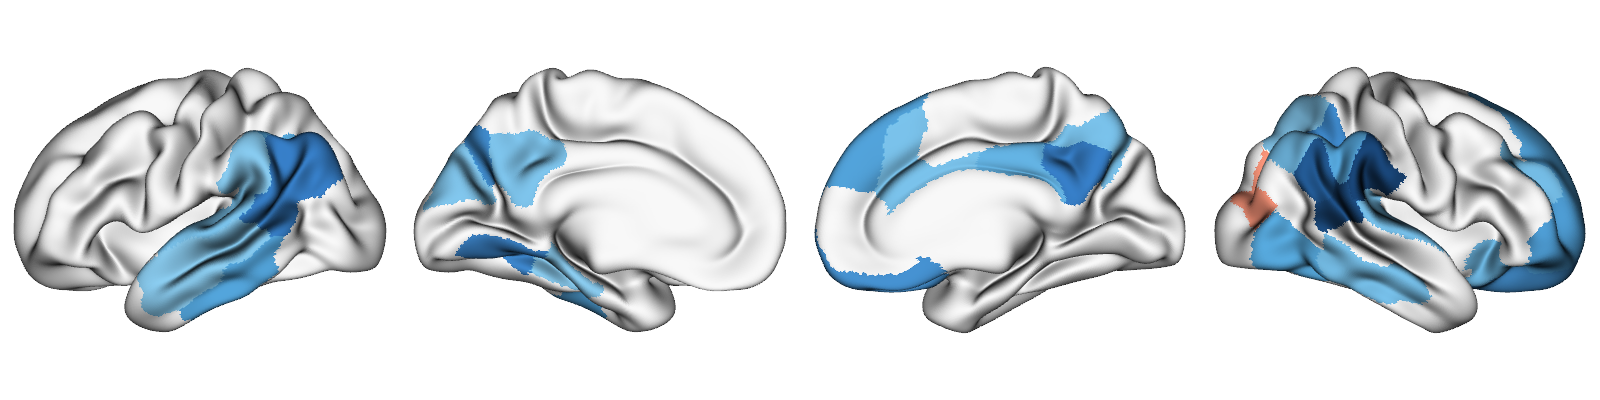

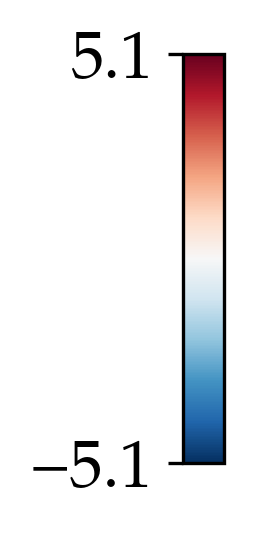

In [6]:
vmin = min(all_stats['altseed']['t'].values.min(), -all_stats['altseed']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['altseed']['t'][all_stats['altseed']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True,
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='row',
)

### (right) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.5370847154847407 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.7546888854868713 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(Alternative seed)', ylabel='E-I ratio age effect\n(Main seed)'>

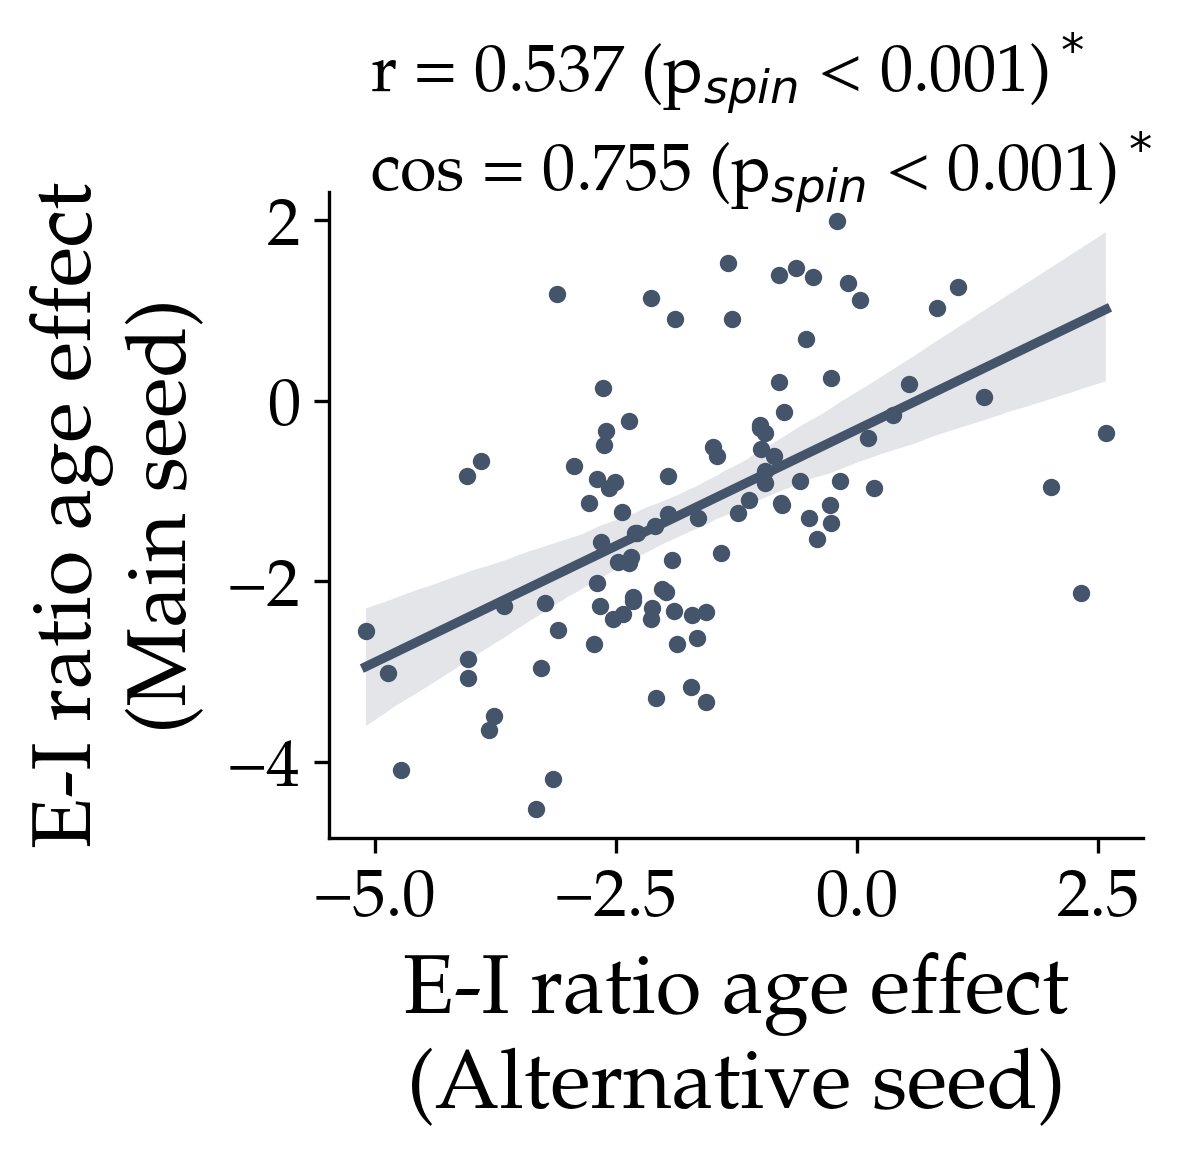

In [7]:
plot.reg_plot(
    all_stats['altseed'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(Alternative seed)',
    ylabel='E-I ratio age effect''\n(Main seed)'
)

## B. ICC

       younger    older      all
count  100.000  100.000  100.000
mean     0.437    0.438    0.471
std      0.195    0.193    0.172
min     -0.120   -0.076   -0.149
25%      0.287    0.317    0.382
50%      0.482    0.458    0.496
75%      0.584    0.584    0.591
max      0.742    0.754    0.771
T =-0.06581517010851545, p = 0.94765770265917


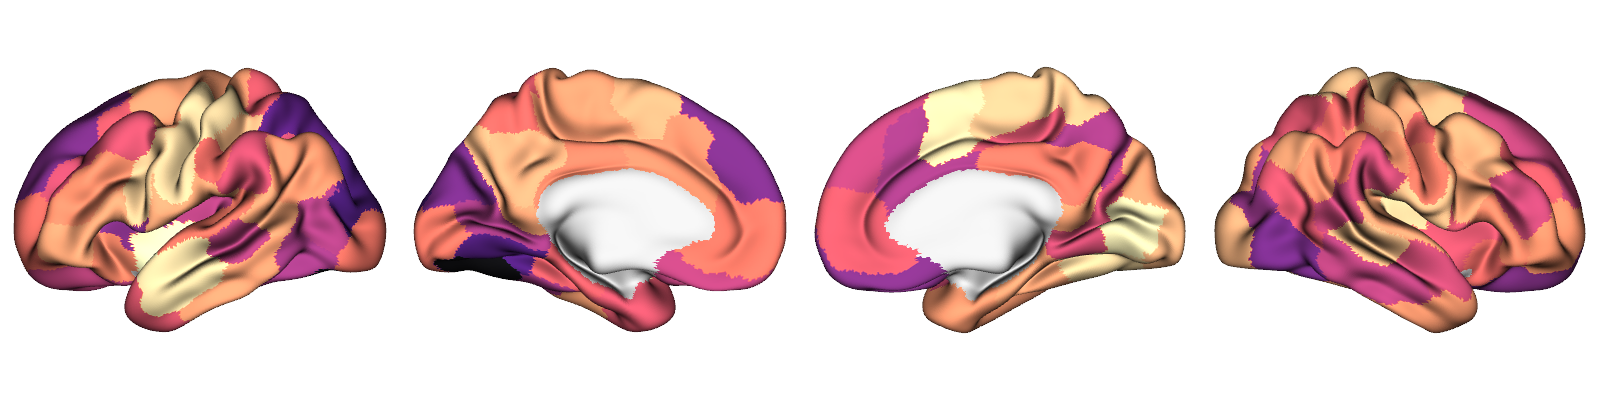

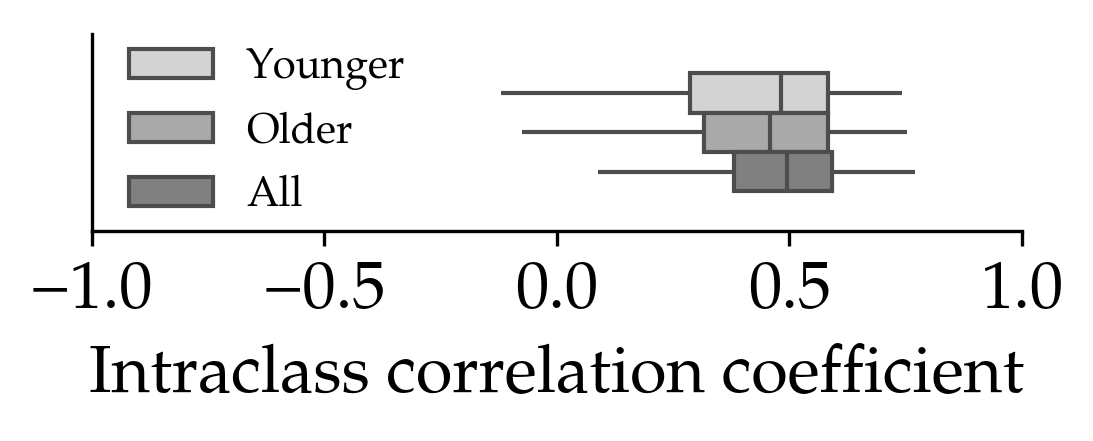

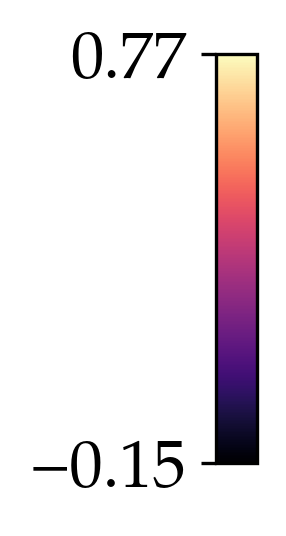

In [8]:
print(all_ICCs_by_age['altseed'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['altseed'], 'schaefer-100')

### (iv) Comparison of GOF

In [9]:
gof_labels = {
    'gof': 'Goodness-of-fit',
    'fc_corr': 'FC correlation',
    'fc_diff': 'FC difference',
    'fcd_ks': 'FCD KS distance',
}

Goodness-of-fit	-0.015	0.988	-0.0	0.046
FC correlation	0.1	0.92	0.0	0.034
FC difference	-3.133	0.002	-0.008	0.037
FCD KS distance	3.93	0.0	0.009	0.031


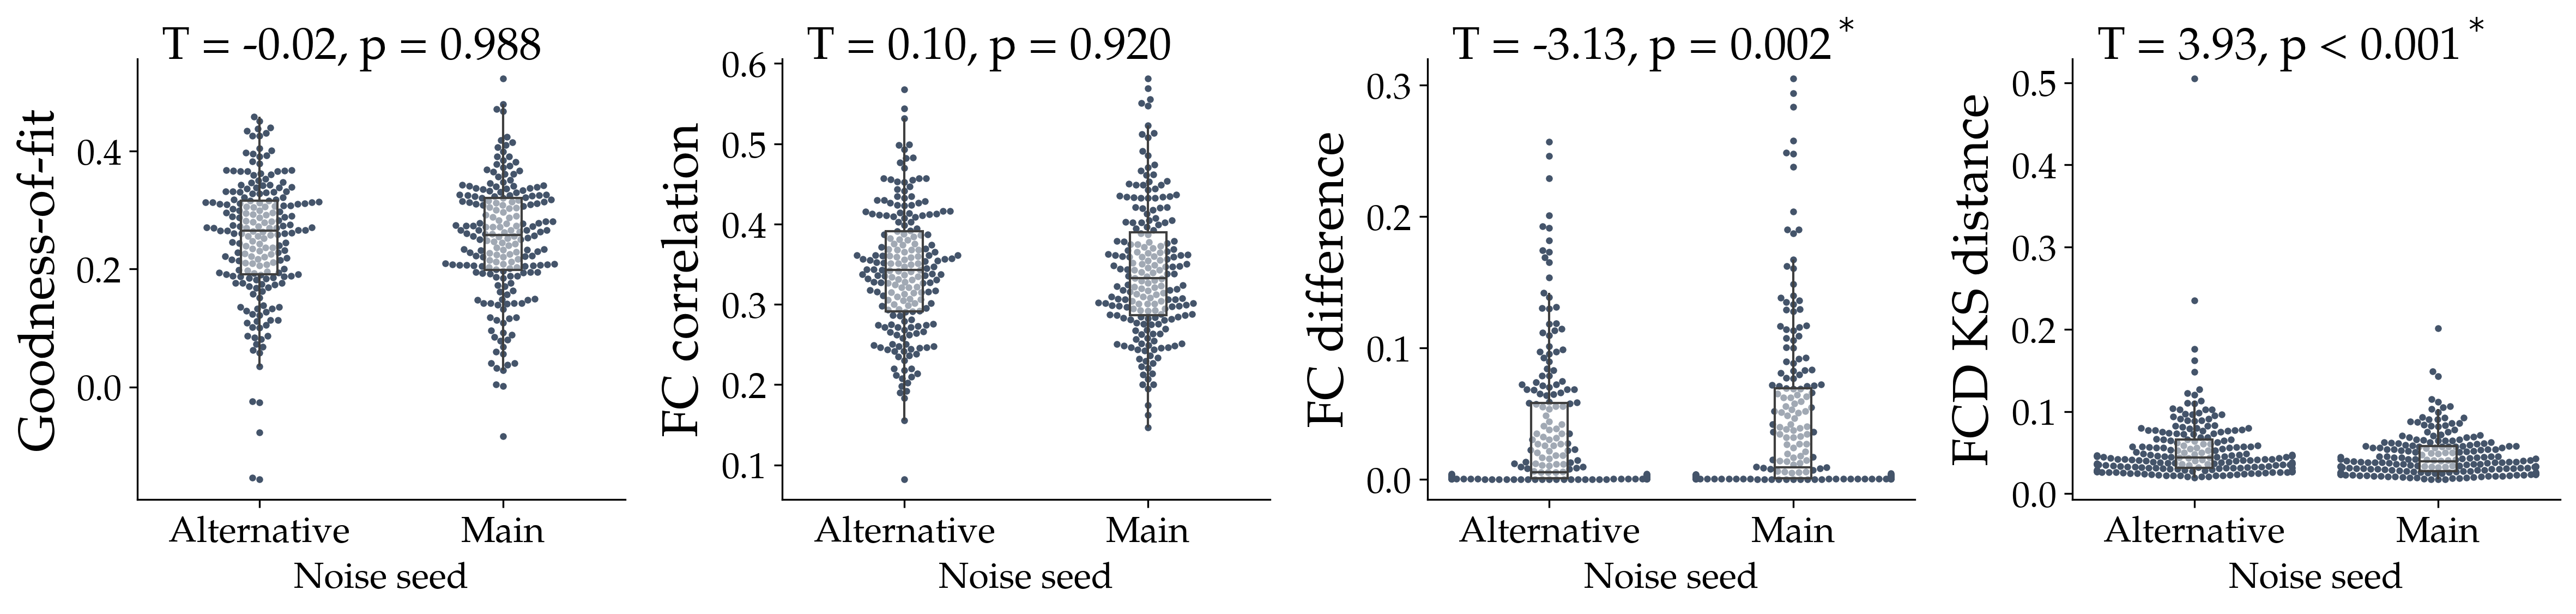

In [10]:
all_data['altseed']['Noise seed'] = 'Alternative'
all_data['main']['Noise seed'] = 'Main'
data_combined = pd.concat([all_data['altseed'], all_data['main']], axis=0)
gof_measures = ['gof','fc_corr', 'fc_diff', 'fcd_ks']
fig, axd = plt.subplot_mosaic(
    [
        gof_measures,
    ],
    gridspec_kw=dict(width_ratios=[1]*4, height_ratios=[1]), 
    figsize=(16, 4)
)

for i, col in enumerate(gof_measures):
    label = gof_labels[col]
    ax = axd[col]
    color= '#44546A'
    sns.swarmplot(
        data=data_combined,
        x='Noise seed', y=col,
        s=3, color=color,
        ax=ax
    )
    sns.boxplot(
        data=data_combined,
        x='Noise seed', y=col,
        showfliers=False,
        showcaps=False, width=0.15,
        boxprops={"facecolor": (1, 1, 1, 0.5)},
        ax=ax)
    plt.setp(ax.collections, zorder=0, label="") # puts swarm in the back
    ax.set_ylabel(label, fontsize=22)
    ax.set_xlabel('Noise seed')
    sns.despine()
    # add statistics
    alt = all_data['altseed'].loc[:, col]
    main = all_data['main'].loc[:, col]
    t, p = scipy.stats.ttest_rel(alt, main)
    if add_text:
        if p > 0.001:
            text = f'T = {t:.2f}, p = {p:.3f}'
        else:
            text = f'T = {t:.2f}, p < 0.001'
        if p < 0.05:
            text+=r'$^*$'
        text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
        text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1
        ax.text(text_x, text_y, 
                text,
                color='black',
                size=20,
                multialignment='left')
    mean_diff = (alt - main).mean()
    sd_diff = (alt - main).std()
    print(label, round(t, 3), round(p,3), round(mean_diff,3), round(sd_diff,3), sep="\t")
fig.tight_layout(pad=1.0)

## D. Effect of age on E-I ratio averaged between runs with main and alternative noise seed

### (left) Unthresholded

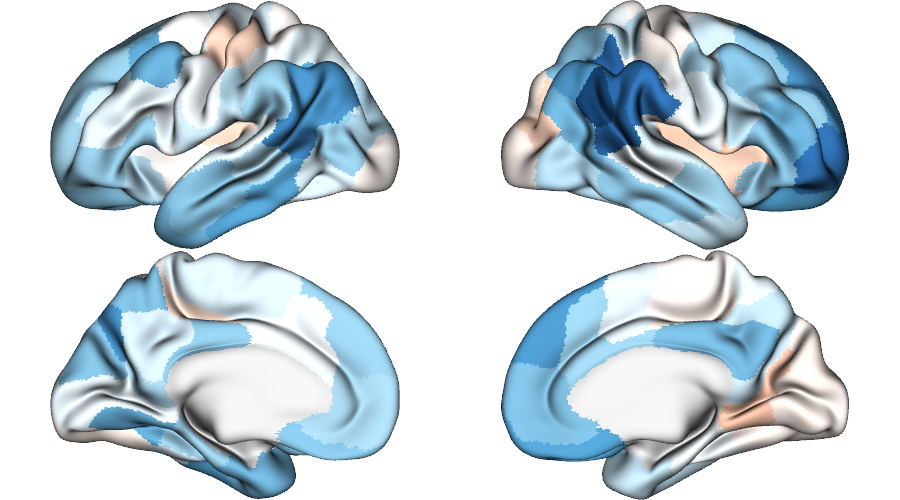

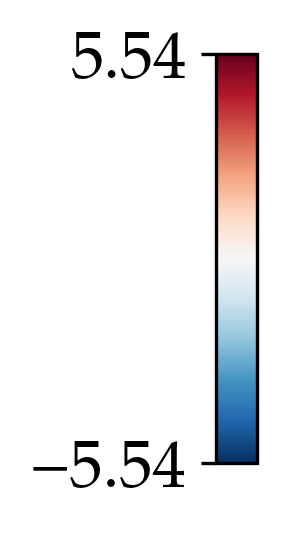

In [11]:
vmin = min(all_stats['main_altseed']['t'].values.min(), -all_stats['main_altseed']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(all_stats['main_altseed']['t'], 'schaefer-100', concat=True, space='fsaverage'), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=True,
    cbar_kwargs=dict(figsize=(2,2)),
    layout_style='grid',
)

### (right) FDR-corrected

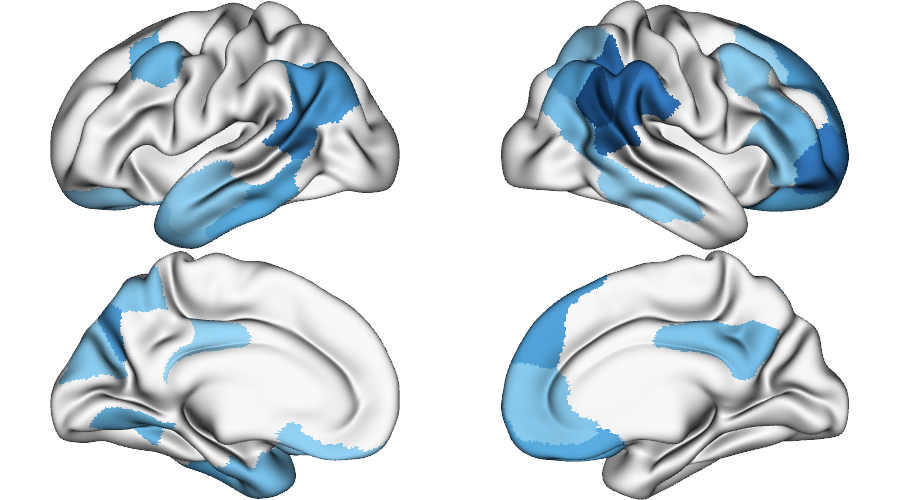

In [12]:
vmin = min(all_stats['main_altseed']['t'].values.min(), -all_stats['main_altseed']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['main_altseed']['t'][all_stats['main_altseed']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=False,
    layout_style='grid',
)

### (Text) Correlation with age effect maps obtained individually from each model

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.8444854672850408 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.911909542707559 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(Alternative+Main seed)', ylabel='E-I ratio age effect\n(Main seed)'>

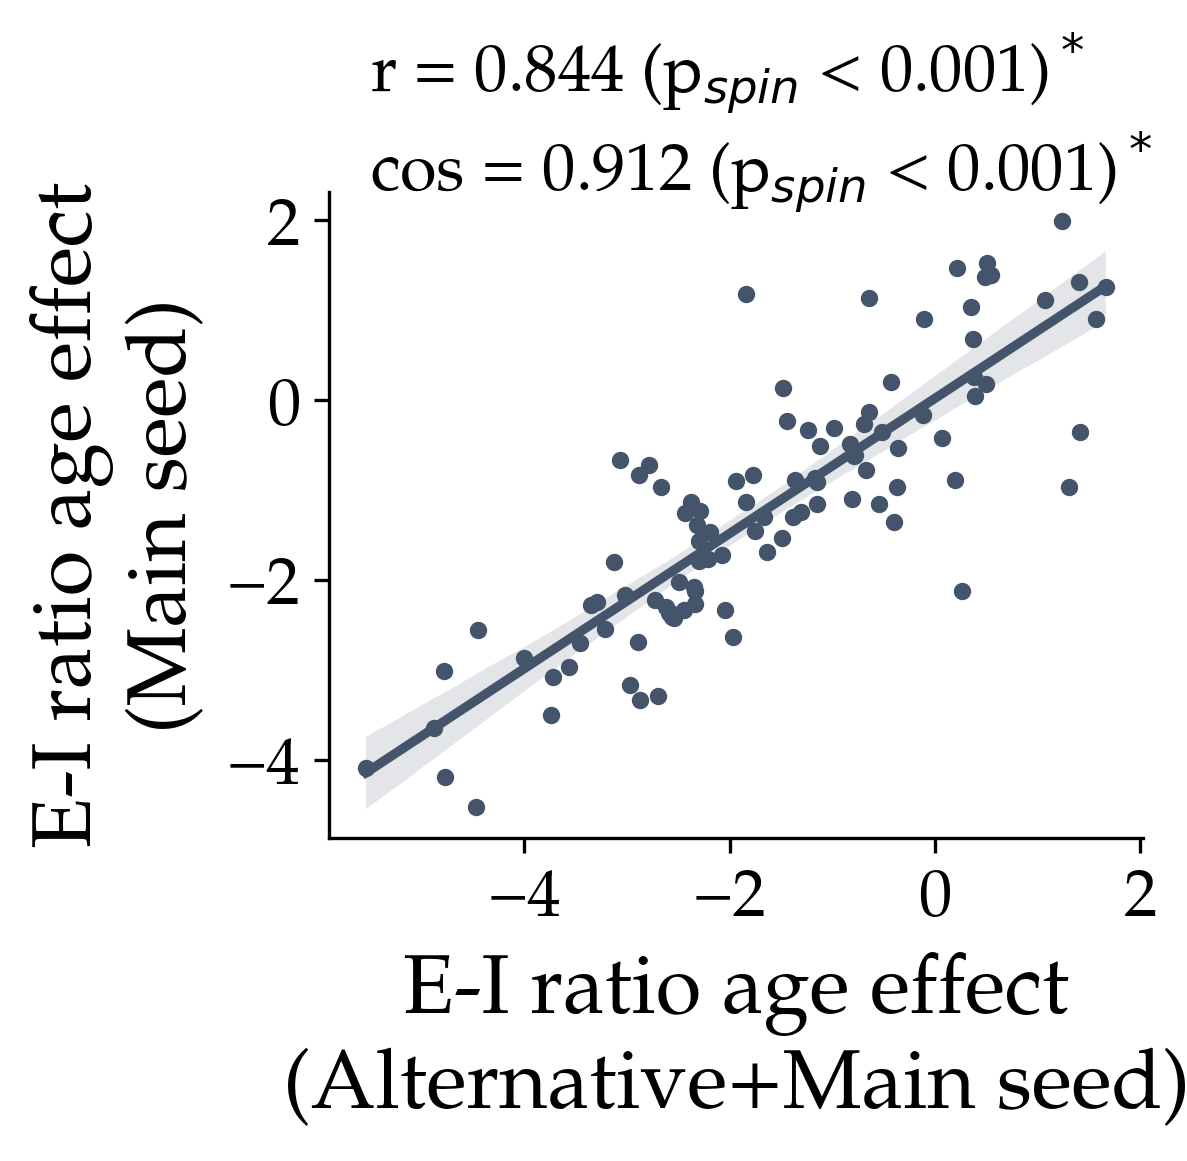

In [13]:
plot.reg_plot(
    all_stats['main_altseed'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(Alternative+Main seed)',
    ylabel='E-I ratio age effect''\n(Main seed)'
)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.8536134964207821 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.930283856873323 ; p-vlaue: 0.0


<Axes: xlabel='E-I ratio age effect\n(Alternative+Main seed)', ylabel='E-I ratio age effect\n(Alternative seed)'>

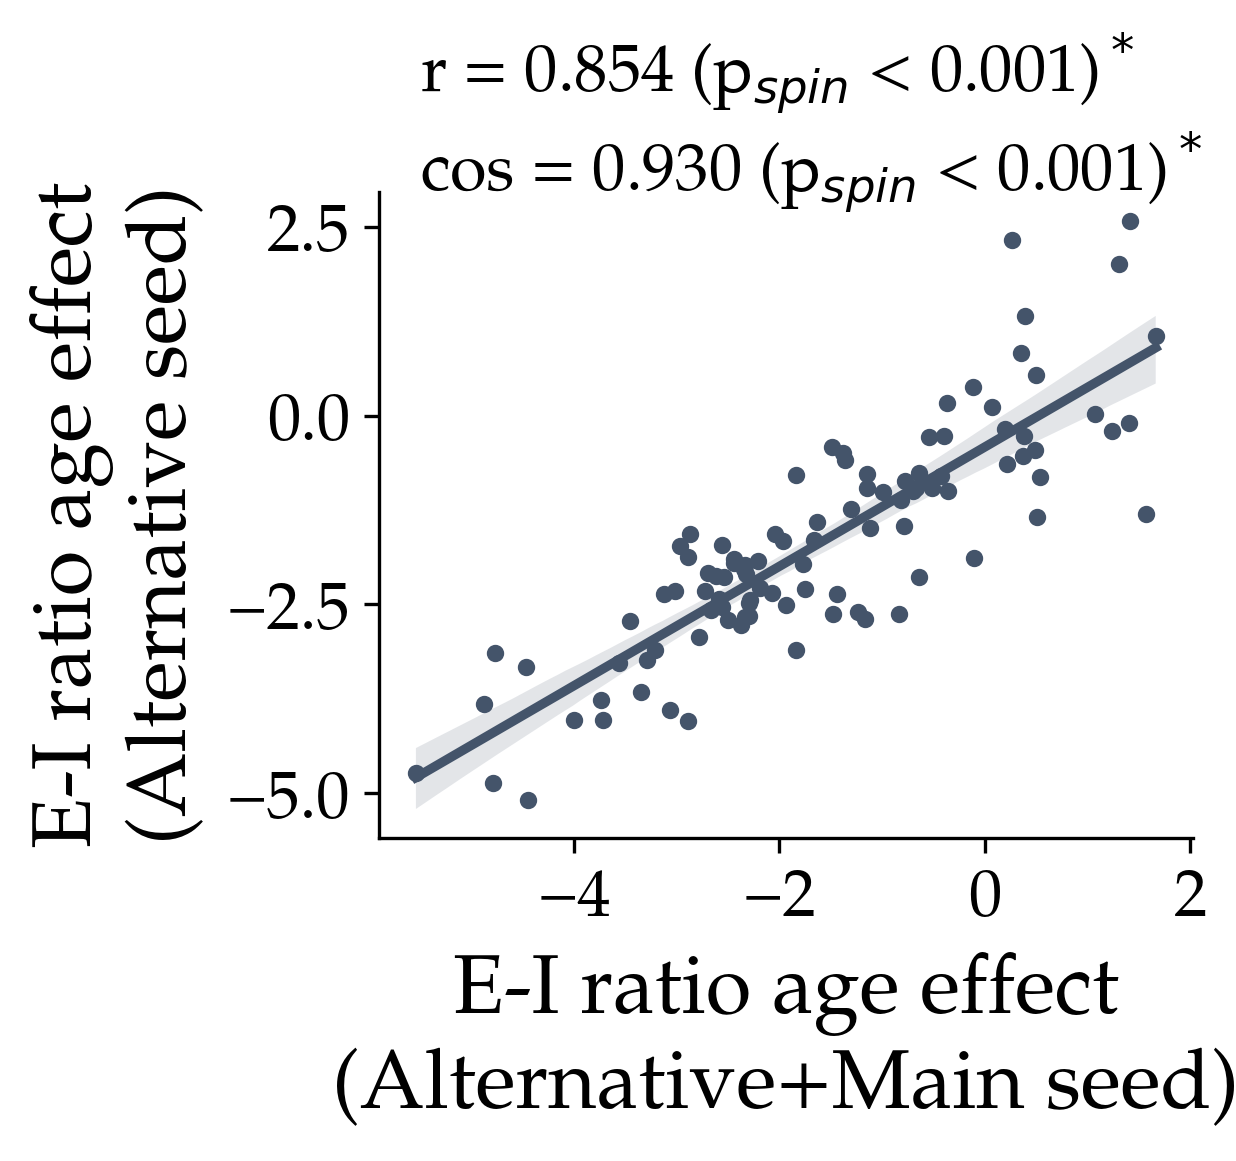

In [14]:
plot.reg_plot(
    all_stats['main_altseed'][['t']], all_stats['altseed'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(Alternative+Main seed)',
    ylabel='E-I ratio age effect''\n(Alternative seed)'
)